## Sympy

SymPy는 symbolic 수학을 위한 Python 라이브러리이다.   
이해하고 쉽게 확장할 수 있도록 코드를 가능한 한 단순하게 유지하면서 완전한 기능을 갖춘 컴퓨터 대수 시스템(CAS)이 되는 것을 목표로 한다.   SymPy는 전적으로 Python으로 작성되었다.  
Numpy 등이 numerical computation을 위한 것이라면, SymPy는 손으로 푸는 방식의 수학 계산을 위한 것이다.  

In [1]:
import sympy

In [2]:
from sympy import I, pi, oo

Sympy의 주요 기능은 ```sympy.Symbol``` class로 정의하는 것으로부터 시작한다.  
Symbol 자체만으로는 큰 유용성은 없으나, expression tree의 node 역할을 담당함으로써 algebraic computation이 가능하게 한다.

In [3]:
x = sympy.Symbol("x")

위와 같이 정의하면 변수 ```x```는 수학 기호 $x$를 의미하게 된다.

In [4]:
type(x)

sympy.core.symbol.Symbol

In [5]:
isinstance(x, sympy.core.Expr)

True

In [6]:
y = sympy.Symbol("y", real=True)

만약 실수 변수를 다루는 것이라면 추가적으로 ```real=True``` 인자를 넣어준다.  

In [7]:
y.is_real

True

In [8]:
x.is_real is None

True

In [9]:
sympy.Symbol("z", imaginary=True).is_real

False

In [10]:
x

x

Symbol에 대한 이런 추가적인 정보를 설정하는 것을 assumption system이라고 한다.

```Symbol``` 객체에 대한 유용한 키워드들

| Assumption keyword argument | Attribute | Description |
|:-------|:-------|:-------|
|```real```, ```imaginary``` | ```is_real```, ```is_imaginary``` | symbol이 실수 혹은 허수임을 의미 |
|```positive```, ```negative``` | ```is_positive```, ```is_negative``` |  symbol이 양수 혹은 음수임을 의미 |
|```integer``` | ```is_integer``` | symbol이 정수임을 의미 |
|```odd```, ```even``` | ```is_odd```, ```is_even``` | symbol이 홀수 혹은 짝수임을 의미 |
|```prime``` | ```is_prime``` | symbol이 소수임을 의미 |
|```finite```, ```infinite``` | ```is_finite```, ```is_infinite``` | symbol이 유한 혹은 무한을 의미 |


Assumption system은 표현식을 단순화하는 것을 가능하게 한다.

In [11]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)
sympy.sqrt(x ** 2)

sqrt(x**2)

In [12]:
sympy.sqrt(y ** 2)

y

(```numpy``` 등의 모듈에도 ```sqrt``` 등의 수학 함수가 존재하기 때문에 섞이지 않도록 주의한다.)

Assumption system과 단순화의 다양한 예

In [13]:
n1 = sympy.Symbol("n")

In [14]:
n2 = sympy.Symbol("n", integer=True)

In [15]:
n3 = sympy.Symbol("n", odd=True)

In [16]:
sympy.cos(n1 * pi)

cos(pi*n)

In [17]:
sympy.cos(n2 * pi)

(-1)**n

In [18]:
sympy.cos(n3 * pi)

-1

여러 개의 symbol을 한꺼번에 정의하고 싶으면 다음과 같이 한다.

In [19]:
a, b, c = sympy.symbols("a, b, c", negative=True)

In [20]:
d, e, f = sympy.symbols("d, e, f", positive=True)

#### Numbers

Sympy에서 숫자를 다루기 위해 일반적인 숫자를 표현식의 일종으로 바꾸어 사용한다.  
그 때 사용되는 클래스가 ```sympy.Integer```, ```sympy.Float``` 등이다.  
Expression을 나타낼 때, python 숫자들은 이러한 객체들로 자동으로 casting 되어 사실 크게 신경쓸 필요는 없지만, 숫자 class에 대해 잘 알아두어 나쁠 것은 없다.  

In [21]:
i = sympy.Integer(19)

In [22]:
"i = {} [type {}]".format(i, type(i))

"i = 19 [type <class 'sympy.core.numbers.Integer'>]"

In [23]:
isinstance(i, sympy.core.Expr)

True

In [24]:
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [25]:
f = sympy.Float(2.3)

In [26]:
"f = {} [type {}]".format(f, type(f))

"f = 2.30000000000000 [type <class 'sympy.core.numbers.Float'>]"

In [27]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

```sympy.sympify``` 명령을 통해 변환할 수도 있다.

In [28]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [29]:
type(i)

sympy.core.numbers.Integer

In [30]:
type(f)

sympy.core.numbers.Float

Sympy number들을 python 숫자로 바꿀 때는 ```int()```, ```float()```등을 이용한다.

In [31]:
int(i)

19

In [32]:
float(f)

2.3

#### Integer

```Symbol```의 instance로서 ```integer=True``` 인자로 생성된 객체는 ```sympy.Integer```와는 조금 다르다.   
```sympy.Symbol(, integer=True)```가 임의의 정수를 의미하는 기호라면, ```sympy.Integer```는 어떤 특정 정수값을 의미한다.  

In [33]:
n = sympy.Symbol("n", integer=True)

In [34]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

위에서 ```n```은 어떤 정수 $n$을 의미하나, 아래에서 ```i```는 특정 정수값 19를 의미한다.

In [35]:
i = sympy.Integer(19)

In [36]:
type(i)

sympy.core.numbers.Integer

In [37]:
isinstance(i, sympy.core.Expr)

True

In [38]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [39]:
i ** 50

8663234049605954426644038200675212212900743262211018069459689001

In [40]:
sympy.factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [41]:
n ** 50

n**50

In [42]:
sympy.factorial(n)

factorial(n)

#### Float

```sympy.Float``` object는 floating-point error로부터 조금 더 자유로운 면이 있다.  
예를 들어, python에서 0.3은 floating-point error로 오차가 있다.

In [43]:
"%.25f" % 0.3  # create a string represention with 25 decimals

'0.2999999999999999888977698'

In [44]:
sympy.Float(0.3, 25)

0.2999999999999999888977698

In [45]:
sympy.Float('0.3', 25)

0.3000000000000000000000000

#### Rational

유리수(분수)는 ```sympy.Rational```를 통해 표현할 수 있다.

In [46]:
sympy.Rational(11, 13)

11/13

In [47]:
r1 = sympy.Rational(2, 3)

In [48]:
r2 = sympy.Rational(4, 5)

In [49]:
r1 * r2

8/15

In [50]:
r1 / r2

5/6

그 외에 특수한 수학 상수들이 있다.

| Mathematical Symbol | Sympy Symbol |
|:----|:----|
| $\pi$ | ```sympy.pi``` | 
| $e$ | ```sympy.E``` |
| $y$ | ```sympy.EulerGamma``` |
| $i$ | ```sympy.I``` |
| $\infty$ | ```sympy.oo``` |

#### Functions

함수들은 ```sympy.Function```으로 정의된다.  
```sympy.Function```은 크게 defined와 undefined로 구분된다.  

In [51]:
x, y, z = sympy.symbols("x, y, z")

In [52]:
f = sympy.Function("f")

In [53]:
type(f)

sympy.core.function.UndefinedFunction

In [54]:
isinstance(f, sympy.core.Expr)

False

```f```에는 아직 어떤 변수도 적용되지 않았다는 관점에서 unapplied function이라고도 한다.

아래에서는 ```f```를 ```x```라는 symbol에 apply하였다.

In [55]:
f(x)

f(x)

In [56]:
type(f(x))

f

In [57]:
isinstance(f(x), sympy.core.Expr)

True

숫자값에 apply할 수도 있다. 

In [58]:
f(3)

f(3)

In [59]:
f(x).diff(x)

Derivative(f(x), x)

In [60]:
print(f(x).diff(x))

Derivative(f(x), x)


이렇게 만들어진 ```f```는 나중에 살펴볼 ```subs``` 등을 통해 보다 구체적으로 활용할 수 있다.

다음에서는 ```g```가 생성되면서 ```x, y, z```의 세 변수에 apply 되도록 하였다.

In [61]:
g = sympy.Function("g")(x, y, z)

In [62]:
g

g(x, y, z)

In [63]:
type(g)

g

In [64]:
isinstance(g, sympy.core.Expr)

True

In [65]:
g.free_symbols

{x, y, z}

```g(x)```나 ```g(1,2,3)``` 같은 코드는 에러가 난다.

Sympy는 많은 built-in function들을 가지고 있다.  

In [66]:
sympy.sin

sin

In [67]:
type(sympy.sin)

sympy.core.function.FunctionClass

In [68]:
isinstance(sympy.sin, sympy.core.Expr)

False

```sympy.sin```는 unapplied function으로 symbol이나 값 혹은, 또다른 expression을 apply 할 수 있다.

In [69]:
sympy.sin(x)

sin(x)

In [70]:
type(sympy.sin(x))

sin

In [71]:
isinstance(sympy.sin(x), sympy.core.Expr)

True

In [72]:
sympy.sin(1)

sin(1)

In [73]:
sympy.sin(pi * 1.5)

-1

In [74]:
n = sympy.Symbol("n", integer=True)

In [75]:
sympy.sin(pi * n)

0

In [76]:
k = sympy.Symbol("k")
sympy.sin(pi * k)

sin(pi*k)

```sympy.Lambda```는 lambda function이라고 하며, evaluate할 수 있는 구조를 가진다.

In [77]:
h = sympy.Lambda(x, x**2)

In [78]:
type(h)

sympy.core.function.Lambda

In [79]:
isinstance(h, sympy.core.Expr)

True

In [80]:
h

Lambda(x, x**2)

In [81]:
h(5)

25

In [82]:
type(h(5))

sympy.core.numbers.Integer

In [83]:
isinstance(h(5), sympy.core.Expr)

True

In [84]:
h(1+x)

(x + 1)**2

In [85]:
type(h(1+x))

sympy.core.power.Pow

In [86]:
isinstance(h(1+x), sympy.core.Expr)

True

#### Expression

앞에서 소개된 여러가지 symbol들은 expression을 만들기 위한 기본 building block의 역할을 한다.  
Expression은 수학적 표현식의 트리 구조라 할 수 있다.  
트리의 노드는 symbol과 수학적 연산을 표현하는 class 들로 구성된다.
수학적 연산들을 담당하는 class들은 다음과 같은 것들이 있다.  
```Add, Mul, Pow, Sum, Product, Integral, Derivative```

In [87]:
x = sympy.Symbol("x")

In [88]:
expr = 1 + 2 * x ** 2 + 3 * x ** 3

In [89]:
expr

3*x**3 + 2*x**2 + 1

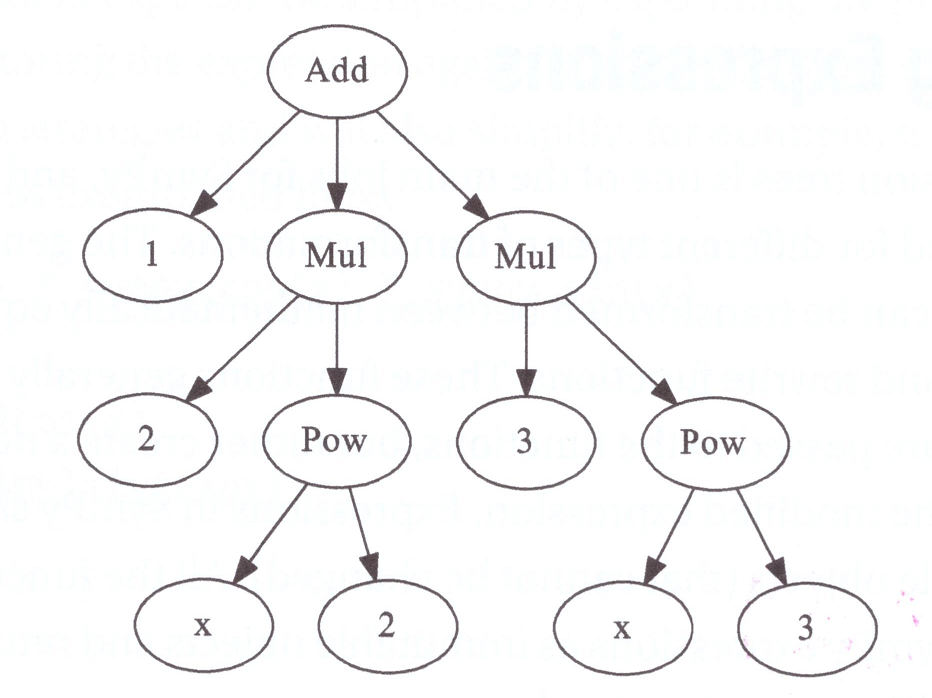

In [90]:
type(expr)

sympy.core.add.Add

In [91]:
isinstance(expr, sympy.core.Expr)

True

In [92]:
expr.args

(1, 2*x**2, 3*x**3)

In [93]:
expr.args[1]

2*x**2

In [94]:
expr.args[1].args

(2, x**2)

In [95]:
expr.args[1].args[1].args

(x, 2)

In [96]:
expr.args[1].args[1].args[0].args

()

#### Simplification

Sympy의 주요 기능은 expression을 동치인 다른 expression으로 변환하는 것이다.  
```sympy.simplify```는 expression을 간단히 하는데 활용된다.

In [97]:
expr = 2 * (x**2 - x) - x * (x+1)

In [98]:
expr

2*x**2 - x*(x + 1) - 2*x

In [99]:
sympy.simplify(expr)

x*(x - 3)

In [100]:
expr.simplify()

x*(x - 3)

In [101]:
expr

2*x**2 - x*(x + 1) - 2*x

In [102]:
expr = 2 * sympy.cos(x) * sympy.sin(x)

In [103]:
expr

2*sin(x)*cos(x)

In [104]:
sympy.simplify(expr)

sin(2*x)

함수의 종류에 따라, 다양한 simplify 방법을 적용할 수 있다. 

| Function | Description |
|:---|:---|
|```sympy.simplify```| 다양한 종류의 expression을 간단히 하기 |
|```sympy.trigsimp```| 삼각함수 관련 expression을 간단히 하기 |
|```sympy.powsimp```| 지수 관련 expression을 간단히 하기 |
|```sympy.compsimp```| 조합적 expression을 간단히 하기 |
|```sympy.ratsimp``` | 공통 분모를 활용하여 간단히 하기 |

In [105]:
sympy.trigsimp(expr)

sin(2*x)

In [106]:
expr = sympy.exp(x) * sympy.exp(y)

In [107]:
expr

exp(x)*exp(y)

In [108]:
sympy.simplify(expr)

exp(x + y)

In [109]:
expr = 2 * sympy.cos(x) * sympy.sin(x) * sympy.exp(x) * sympy.exp(y)

In [110]:
expr

2*exp(x)*exp(y)*sin(x)*cos(x)

In [111]:
sympy.trigsimp(expr)

exp(x)*exp(y)*sin(2*x)

In [112]:
sympy.powsimp(expr)

2*exp(x + y)*sin(x)*cos(x)

In [113]:
sympy.simplify(expr)

exp(x + y)*sin(2*x)

#### Expand

Simplification과 반대로 식을 전개하는 기능도 있다.  
```sympy.expand(expr)```을 이용한다.

In [114]:
expr = (x + 1) * (x + 2)

In [115]:
expr

(x + 1)*(x + 2)

In [116]:
sympy.expand(expr)

x**2 + 3*x + 2

In [117]:
sympy.simplify(expr)

(x + 1)*(x + 2)

In [118]:
sympy.sin(x + y).expand(trig=True)

sin(x)*cos(y) + sin(y)*cos(x)

In [119]:
a, b = sympy.symbols("a, b", positive=True)

In [120]:
sympy.log(a * b).expand(log=True)

log(a) + log(b)

In [121]:
sympy.exp(I*a + b).expand(complex=True)

I*exp(b)*sin(a) + exp(b)*cos(a)

In [122]:
sympy.expand((a * b)**x, power_exp=True)

a**x*b**x

In [123]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

exp(I*a*x)*exp(-I*b*x)

#### Factor

```sympy.factor```는 식을 인수분해한다.  
```sympy.expand(expr, mul=True)```의 개념을 반대로 진행한다.  

In [124]:
sympy.factor(x**2 - 1)

(x - 1)*(x + 1)

In [125]:
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

x*(sin(z) + cos(y))

로그 함수나, 지수 함수, 삼각함수와 관련된 factoring은 ```sympy.logcombine```, ```sympy.powsimp```, ```sympy.trigsimp``` 등을 이용한다.

In [126]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

log(a/b)

In [127]:
expr = x + y + x * y * z
expr

x*y*z + x + y

완전히 인수분해 가능한 식이 아니더라도, 특정 symbol을 기준으로 묶어서 정리할 때, ```collect```를 이용한다.

In [128]:
expr.factor()

x*y*z + x + y

In [129]:
expr.collect(x)

x*(y*z + 1) + y

In [130]:
expr.collect(y)

x + y*(x*z + 1)

In [131]:
expr = sympy.cos(x + y) + sympy.sin(x - y)
expr

sin(x - y) + cos(x + y)

In [132]:
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))

(sin(x) + cos(x))*(-sin(y) + cos(y))

#### Apart, Together, Cancel

In [133]:
expr = 1/(x**2 + 3*x + 2)
expr

1/(x**2 + 3*x + 2)

In [134]:
sympy.apart(expr, x)

-1/(x + 2) + 1/(x + 1)

In [135]:
expr = 1 / (y * x + y) + 1 / (1+x)
expr

1/(x*y + y) + 1/(x + 1)

In [136]:
sympy.together(expr)

(y + 1)/(y*(x + 1))

In [137]:
sympy.simplify(expr)

(y + 1)/(y*(x + 1))

In [138]:
expr = y / (y * x + y)
expr

y/(x*y + y)

In [139]:
sympy.cancel(expr)

1/(x + 1)

In [140]:
sympy.simplify(expr)

1/(x + 1)

#### Substitution

Symbol이나 expression에 대입을 할 때 ```subs```를 이용한다.

In [141]:
(x + y).subs(x, y)

2*y

In [142]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

sin(y*exp(y))

여러 symbol이나 expression에 한꺼번에 대입할 때는 dictionary를 이용한다.

In [143]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

cos(y*exp(y))

In [144]:
expr = x * y + z**2 *x

In [145]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [146]:
expr.subs(values)

13.3000000000000

숫자를 대입하여도 숫자 결과가 나왔지만, 반환값은 여전히 sympy object임에 주의.

In [147]:
type(expr.subs(values))

sympy.core.numbers.Float

즉, 다음과 같은 코드는 에러가 발생할 것이다.

```
import numpy as np
np.sqrt(expr.subs(values))
```

positive로 정의된 symbol에 음수 값 대입 가능하니 주의

In [148]:
sympy.Symbol("y", positive=True).subs(y, -10)

y

#### Numerical evaluation

위에서는 symbolic 계산을 하였지만, 숫자값을 계산하고자 할 때는 ```sympy.N``` 혹은```evalf``` method를 이용한다.

In [149]:
sympy.N(1 + pi)

4.14159265358979

In [150]:
type(sympy.N(1 + pi))

sympy.core.numbers.Float

In [151]:
sympy.N(pi, 50)

3.1415926535897932384626433832795028841971693993751

In [152]:
(x + 1/pi).evalf(7)

x + 0.3183099

In [153]:
type((x + 1/pi).evalf(7))

sympy.core.add.Add

In [154]:
(x + 1/pi).subs(x, 10)

1/pi + 10

In [155]:
(x + 1/pi).subs(x, 10).evalf(5)

10.318

In [156]:
expr = sympy.sin(pi * x * sympy.exp(x))
expr

sin(pi*x*exp(x))

In [157]:
[expr.subs(x, xx) for xx in range(0, 10)]

[0,
 sin(E*pi),
 sin(2*pi*exp(2)),
 sin(3*pi*exp(3)),
 sin(4*pi*exp(4)),
 sin(5*pi*exp(5)),
 sin(6*pi*exp(6)),
 sin(7*pi*exp(7)),
 sin(8*pi*exp(8)),
 sin(9*pi*exp(9))]

In [158]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

[0, 0.774, 0.642, 0.722, 0.944, 0.205, 0.974, 0.977, -0.870, -0.695]

위 방법도 가능하지만 속도 면에서 ```lambdify```를 이용하는 것이 좋다.

```lambdify```는 numerical evaluation 만을 위한 함수를 만들 수 있게 한다.  
```lambdify```를 통해 생성된 함수는 주어진 expression의 free parameter symbol의 수만큼 인자를 받을 수 있다.

In [159]:
expr_func = sympy.lambdify(x, expr)

In [160]:
expr_func 

<function _lambdifygenerated(x)>

In [161]:
type(expr_func)

function

In [162]:
expr_func(1.0)

0.773942685266709

```expr_func```에는 symbol이 전달되지 않으니, 예를 들어 다음 코드는 에러가 난다.  
```expr_func(pi)```

In [163]:
# 물론 numpy pi는 전달 가능
import numpy as np
expr_func(np.pi)

0.8115393579712379

```'numpy'```를 추가 인자로 전달하여, 주어진 numpy array의 값 모두에 대해 vectorized 방식으로 계산하도록 할 수 있다.

In [164]:
expr_func = sympy.lambdify(x, expr, 'numpy')

In [165]:
expr_func(np.arange(0, 10))

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

#### Derivative

```sympy.diff```를 이용하여 symbolic derivative를 구할 수 있다.  
아래는 undefined function에 대한 예제들이다.

In [166]:
f = sympy.Function('f')(x)

In [167]:
sympy.diff(f, x)

Derivative(f(x), x)

In [168]:
sympy.diff(f, x, x)

Derivative(f(x), (x, 2))

In [169]:
sympy.diff(f, x, 3)

Derivative(f(x), (x, 3))

In [170]:
g = sympy.Function('g')(x, y)

In [171]:
g.diff(x, y)

Derivative(g(x, y), x, y)

In [172]:
g.diff(x, 3, y, 2)         # equivalent to s.diff(g, x, x, x, y, y)

Derivative(g(x, y), (x, 3), (y, 2))

Defined function이나 expression에 대해 미분할 수 있다.

In [173]:
expr = x**4 + x**3 + x**2 + x + 1
expr

x**4 + x**3 + x**2 + x + 1

In [174]:
expr.diff(x)

4*x**3 + 3*x**2 + 2*x + 1

In [175]:
sympy.diff(expr, x)

4*x**3 + 3*x**2 + 2*x + 1

In [176]:
expr.diff(x, x)

2*(6*x**2 + 3*x + 1)

In [177]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [178]:
expr.diff(x, y, z)

6*y*(x + 1)**2

In [179]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)

In [180]:
expr.diff(x)

y*cos(x/2)*cos(x*y) - sin(x/2)*sin(x*y)/2

In [181]:
expr = sympy.functions.special.polynomials.hermite(x, 0)

In [182]:
expr

2**x*sqrt(pi)/gamma(1/2 - x/2)

In [183]:
expr.diff(x)

2**x*sqrt(pi)*polygamma(0, 1/2 - x/2)/(2*gamma(1/2 - x/2)) + 2**x*sqrt(pi)*log(2)/gamma(1/2 - x/2)

Derivative를 계산하지 않고, sybolically 표현하기 위해서는 ```sympy.Derivative```를 이용한다.

In [184]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

Derivative(exp(cos(x)), x)

In [185]:
d.doit()

-exp(cos(x))*sin(x)

#### Integrals

Symbolic integral을 하기 위해서는 ```sympy.integrate```를 이용하고, 적분 표현식을 유지하기 위해서는 ```sympy.Integral```을 이용한다.

In [186]:
a, b = sympy.symbols("a, b")
x, y = sympy.symbols('x, y')
f = sympy.Function('f')(x)

In [187]:
sympy.integrate(f)

Integral(f(x), x)

In [188]:
sympy.integrate(f, (x, a, b))

Integral(f(x), (x, a, b))

In [189]:
sympy.integrate(sympy.sin(x))

-cos(x)

In [190]:
sympy.integrate(sympy.sin(x), (x, a, b))

cos(a) - cos(b)

In [191]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

sqrt(pi)/2

In [192]:
a, b, c = sympy.symbols("a, b, c", positive=True)

In [193]:
integrand = a * sympy.exp(-((x-b)/c)**2)
integrand

a*exp(-(-b + x)**2/c**2)

In [194]:
sympy.Integral(integrand, x)

Integral(a*exp(-(-b + x)**2/c**2), x)

In [195]:
sympy.integrate(integrand, (x, -oo, oo))

sqrt(pi)*a*c

In [196]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

Integral(sin(x*cos(x)), x)

In [197]:
expr = sympy.sin(x*sympy.exp(y))
expr

sin(x*exp(y))

In [198]:
sympy.integrate(expr, x)

-exp(-y)*cos(x*exp(y))

In [199]:
expr = (x + y)**2
expr

(x + y)**2

In [200]:
sympy.integrate(expr, x)

x**3/3 + x**2*y + x*y**2

In [201]:
sympy.integrate(expr, x, y)

x**3*y/3 + x**2*y**2/2 + x*y**3/3

In [202]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

7/6

적분은 통상적으로 미분보다 어렵다.

In [203]:
nonelementry_integrand = sympy.sqrt(1 - x**4)
nonelementry_integrand

sqrt(1 - x**4)

In [204]:
sympy.integrate(nonelementry_integrand, x)

x*gamma(1/4)*hyper((-1/2, 1/4), (5/4,), x**4*exp_polar(2*I*pi))/(4*gamma(5/4))

In [205]:
sympy.integrate( 1 / sympy.log(x), x)

li(x)

In [206]:
sympy.integrate(sympy.sin(x**2), x)

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))

#### Series

Series expansion은 다항식 근사로 활용된다.

In [207]:
x = sympy.Symbol("x")
f = sympy.Function("f")(x)

In [208]:
type(f)

f

In [209]:
isinstance(f, sympy.core.Expr)

True

In [210]:
sympy.series(f, x)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + x**5*Subs(Derivative(f(xi), (xi, 5)), xi, 0)/120 + O(x**6)

Series expansion의 위치는 보통 ```"{x_0}"```로 표현한다.

In [211]:
x0 = sympy.Symbol("{x_0}")
x0

{x_0}

In [212]:
f.series(x, x0, n=2)

f({x_0}) + (x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + O((x - {x_0})**2, (x, {x_0}))

In [213]:
f.series(x, sympy.Symbol("a"), n=2)

f(a) + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + O((-a + x)**2, (x, a))

In [214]:
f.series(x, x0, n=2).removeO()

(x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + f({x_0})

In [215]:
sympy.cos(x).series()

1 - x**2/2 + x**4/24 + O(x**6)

In [216]:
sympy.sin(x).series()

x - x**3/6 + x**5/120 + O(x**6)

In [217]:
sympy.exp(x).series()

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [218]:
(1/(1+x)).series()

1 - x + x**2 - x**3 + x**4 - x**5 + O(x**6)

In [219]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))

In [220]:
expr.series(x, n=4)

1 - x*y + x**2*(y**2 - 1/2) + x**3*(-5*y**3/6 + y/2) + O(x**4)

In [221]:
expr.series(y, n=4)

cos(x) - x*y*cos(x) + x**2*y**2*cos(x) - 5*x**3*y**3*cos(x)/6 + O(y**4)

In [222]:
expr.series(y).removeO().series(x).removeO().expand()

-61*x**5*y**5/120 + 5*x**5*y**3/12 - x**5*y/24 + 2*x**4*y**4/3 - x**4*y**2/2 + x**4/24 - 5*x**3*y**3/6 + x**3*y/2 + x**2*y**2 - x**2/2 - x*y + 1

#### Limit

극한값은 ```sympy.limit```을 통해 계산할 수 있다.

In [223]:
sympy.limit(sympy.sin(x) / x, x, 0)

1

Limit의 주요 example은 미분의 극한 표현이다.

In [224]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

In [225]:
diff_limit = (f(x + h) - f(x))/h
diff_limit

(-f(x) + f(h + x))/h

In [226]:
diff_limit.subs(f, sympy.cos)

(-cos(x) + cos(h + x))/h

In [227]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

-sin(x)

In [228]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

cos(x)

변수의 값을 무한으로 보낼 때의 극한 값을 구해 보기

In [229]:
expr = (x**2 - 3*x) / (2*x - 2)

In [230]:
p = sympy.limit(expr/x, x, oo)

In [231]:
q = sympy.limit(expr - p*x, x, oo)

In [232]:
p

1/2

In [233]:
q

-1

#### Sums and Product

$\sum$과 $\prod$는 ```sympy.Sum```과 ```sympy.Product```를 통해 표현된다.

In [234]:
n = sympy.symbols("n", integer=True)

In [235]:
x = sympy.Sum(1/(n**2), (n, 1, oo))
x

Sum(n**(-2), (n, 1, oo))

In [236]:
type(x)

sympy.concrete.summations.Sum

In [237]:
isinstance(x, sympy.core.Expr)

True

Evaluation은 ```doit()``` 통해 이루어진다.

In [238]:
x.doit()

pi**2/6

In [239]:
x = sympy.Symbol("x")

In [240]:
prd = sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo))
prd

Sum(x**n/factorial(n), (n, 1, oo))

In [241]:
prd.doit()

x*(exp(x)/x - 1/x)

In [242]:
prd.doit().simplify()

exp(x) - 1

#### Equations

방정식을 풀기 위해, ```sympy.solve```를 이용한다.

아래는 $ x^2 + 2x - 3 = 0 $을 푸는 문제이다.

In [243]:
x = sympy.symbols("x")
sympy.solve(x**2 + 2*x - 3)

[-3, 1]

In [244]:
a, b, c = sympy.symbols("a, b, c")

In [245]:
sympy.solve(a * x**2 + b * x + c, x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

In [246]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

[pi/4]

In [247]:
sympy.solve(sympy.exp(x) + 2 * x, x)

[-LambertW(1/2)]

하지만 수많은 풀기 어렵거나 풀리지 않는 방정식들이 있으니 주의.

In [248]:
sympy.solve(x**5 - x**2 + 1, x)

[CRootOf(x**5 - x**2 + 1, 0),
 CRootOf(x**5 - x**2 + 1, 1),
 CRootOf(x**5 - x**2 + 1, 2),
 CRootOf(x**5 - x**2 + 1, 3),
 CRootOf(x**5 - x**2 + 1, 4)]

아래 방정식은 풀지 못한다.  
```sympy.solve(sympy.tan(x) - x, x)```

연립방정식도 해결할 수 있다.

In [249]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1

In [250]:
temp = sympy.solve([eq1, eq2], [x, y], dict=True)
temp

[{x: -1/3, y: 2/3}]

In [251]:
eq1 = x**2 - y
eq2 = y**2 - x

In [252]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

[{x: 0, y: 0},
 {x: 1, y: 1},
 {x: (-1/2 - sqrt(3)*I/2)**2, y: -1/2 - sqrt(3)*I/2},
 {x: (-1/2 + sqrt(3)*I/2)**2, y: -1/2 + sqrt(3)*I/2}]

In [253]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

#### Linear algebra

Vector와 matrix를 symbolically 나타내기 위해 ```sympy.Matrix```를 이용한다.

In [254]:
sympy.Matrix([1,2])

Matrix([
[1],
[2]])

In [255]:
type(sympy.Matrix([1,2]))

sympy.matrices.dense.MutableDenseMatrix

In [256]:
isinstance(sympy.Matrix([1,2]), sympy.core.Expr)

False

In [257]:
sympy.Matrix([[1,2]])

Matrix([[1, 2]])

In [258]:
sympy.Matrix([[1, 2], [3, 4]])

Matrix([
[1, 2],
[3, 4]])

In [259]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

Matrix([
[ 0,  1,  2,  3],
[10, 11, 12, 13],
[20, 21, 22, 23]])

In [260]:
a, b, c, d = sympy.symbols("a, b, c, d")

In [261]:
M = sympy.Matrix([[a, b], [c, d]])
M

Matrix([
[a, b],
[c, d]])

```*```는 matrix multiplication이다.

In [262]:
M * M

Matrix([
[a**2 + b*c,  a*b + b*d],
[ a*c + c*d, b*c + d**2]])

In [263]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
x

Matrix([
[x_1],
[x_2]])

In [264]:
M * x

Matrix([
[a*x_1 + b*x_2],
[c*x_1 + d*x_2]])

다음 예제에서는 다음의 문제를 푼다.  
$$ \begin{bmatrix} 1 & p \\ q & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} $$

In [265]:
p, q = sympy.symbols("p, q")
M = sympy.Matrix([[1, p], [q, 1]])
M

Matrix([
[1, p],
[q, 1]])

In [266]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))

In [267]:
x = M.solve(b)
x

Matrix([
[(-b_1 + b_2*p)/(p*q - 1)],
[ (b_1*q - b_2)/(p*q - 1)]])

In [268]:
x = M.LUsolve(b)
x

Matrix([
[b_1 - p*(-b_1*q + b_2)/(-p*q + 1)],
[        (-b_1*q + b_2)/(-p*q + 1)]])

In [269]:
sympy.simplify(x)

Matrix([
[(-b_1 + b_2*p)/(p*q - 1)],
[ (b_1*q - b_2)/(p*q - 1)]])

In [270]:
x = M.inv() * b
x

Matrix([
[ b_1/(-p*q + 1) - b_2*p/(-p*q + 1)],
[-b_1*q/(-p*q + 1) + b_2/(-p*q + 1)]])

In [271]:
sympy.simplify(x)

Matrix([
[(-b_1 + b_2*p)/(p*q - 1)],
[ (b_1*q - b_2)/(p*q - 1)]])